In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')
%matplotlib inline

In [174]:
# Dataset URL: https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/latest_data/latestdata.csv

In [175]:
#d = pd.read_csv("https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/latest_data/latestdata.csv")

In [176]:
train = pd.read_csv("covid2train.csv", index_col = 0)

In [177]:
def clean(train):
    features = ['age', 'sex', 'country', 'chronic_disease_binary', 'que_paso']
    xtrain = train[features]

# Dropping NA's from only 'sex' + 'country'    
    subset = xtrain.dropna(subset = ['age','sex','country'])
    countries = xtrain['country'].drop_duplicates().dropna()

# Replacing the age ranges with their means    
    mp = {'20-29': np.mean([20,29]), '40-49': np.mean([40,49]),'50-59': np.mean([50,59]),
          '60-69': np.mean([60,69]), '70-79': np.mean([70,79]),
          '80-89': np.mean([80,89]),'90-99': np.mean([90,99]), '80-': 80}
    
# Dictionary replacing countries with numerical values
    mp2 = {}
    key = np.arange(len(countries) + 1)
    for i,j in zip(countries,key):
        val = {i:j}
        mp2.update(val)
        
    mp3 = {'male': 0, 'female': 1}
        
# Updating the training data with new values
    subset = subset.replace(mp).replace(mp2).replace(mp3)
    subset['chronic_disease_binary'] = subset['chronic_disease_binary']*1
    subset['age'] = subset['age'].astype(float)
    xtrain = subset.drop('que_paso', axis = 1)
    ytrain = subset['que_paso']
    return xtrain, ytrain, mp2

In [178]:
xtrain, ytrain, mp2 = clean(train)

In [179]:
from sklearn.ensemble import RandomForestClassifier 

clf =  RandomForestClassifier(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True, random_state=42)

clf.fit(xtrain, ytrain)

var_imp = rf.feature_importances_
var = xtrain.columns

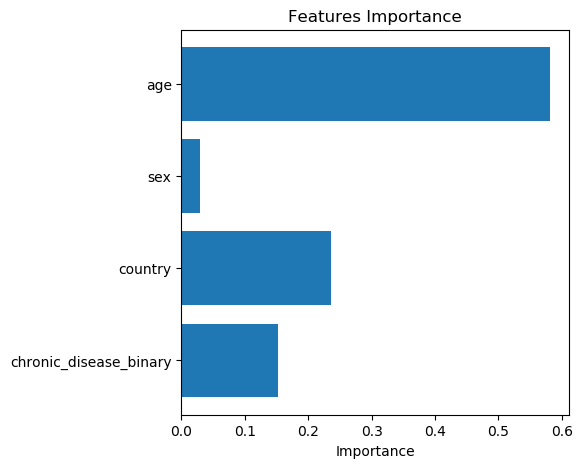

In [180]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (5,5))

y_pos = np.arange(len(var))

ax.barh(y_pos, var_imp, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(var)
ax.invert_yaxis() 
ax.set_xlabel('Importance')
ax.set_title('Features Importance')

plt.show()

In [181]:
age = xtrain['age']
xtrain['outcome'] = ytrain

age_death = xtrain['outcome'] == 0
age_rec = xtrain['outcome'] == 1
age_ill = xtrain['outcome'] == 2

xdeath = xtrain[age_death]
xrec = xtrain[age_rec]
x_ill = xtrain[age_ill]

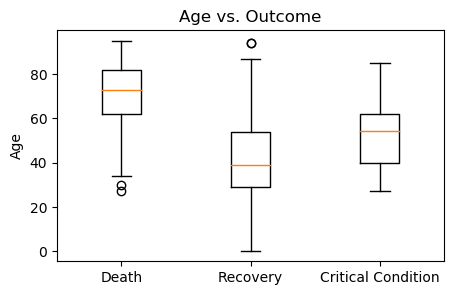

In [203]:
age1 = xdeath['age']
age2 = xrec['age']
age3 = x_ill['age']

data = [age1, age2, age3]
fig, ax = plt.subplots(figsize = (5,3))
ax.set_title('Age vs. Outcome')

ax.boxplot(data, labels = ['Death', 'Recovery', 'Critical Condition'])
ax.set_ylabel("Age")
plt.show()